### Import

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [90]:
imp=r"C:\Users\bosse\Desktop\Notebooks\Data\Project\Kaggle_dedub.csv"
imp=r"C:\Users\Franz.000\Documents\GitHub\MAY23_BDA_INT_Crowdfunding\data\kaggle\Kaggle_deduplicated.csv"
df=pd.read_csv(imp,index_col='id')
df.drop(columns='Unnamed: 0',inplace=True)
display(df.head())
display(df.info())

,currency,backers_count,country,status,usd_pledged,main_category,goal_usd,city,duration,launched_year,creator_projects
id,,,,,,,,,,,
1714728788,CAD,16,CA,failed,577.902078,Farms,785.82065,Victoria,60.0,2018,1
1639965256,USD,7,US,successful,211.000000,Academic,93.00000,San Diego,24.0,2014,1
1582062943,USD,99,US,successful,4697.000000,Small Batch,1500.00000,Philadelphia,30.0,2020,1
1888984372,USD,3,US,failed,222.000000,Gadgets,25000.00000,Chicago,60.0,2019,1
1409770586,USD,100,US,successful,5410.000000,Radio & Podcasts,5000.00000,Madrid,30.0,2015,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180677 entries, 1714728788 to 1126079486
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   currency          180677 non-null  object 
 1   backers_count     180677 non-null  int64  
 2   country           180677 non-null  object 
 3   status            180677 non-null  object 
 4   usd_pledged       180677 non-null  float64
 5   main_category     180677 non-null  object 
 6   goal_usd          180677 non-null  float64
 7   city              180677 non-null  object 
 8   duration          180677 non-null  float64
 9   launched_year     180677 non-null  int64  
 10  creator_projects  180677 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 16.5+ MB


None

In [91]:
# Potential Simplification of variables
df['country'].replace(['GB','CA'],'GB,CA',inplace=True)
df['country'].replace(['DE','FR','IT','ES','NL','SE','DK','CH','IE','BE','AT','NO','LU','PL','GR','SI'],'Europe',inplace=True)
df['country'].replace(['HK','SG','JP'],'Asia',inplace=True)
df['country'].replace(['MX'],'South America and Mexico',inplace=True)
df['country'].replace(['AU','NZ'],'Australia and new Zealand',inplace=True)
df['main_category'].replace(['music','film & video','games','comics','dance'],'Entertainment',inplace=True)
df['main_category'].replace(['art','fashion','design','photography','theater'],'Culture',inplace=True)
df['main_category'].replace(['technology','publishing','food','crafts','journalism'],'Others',inplace=True)
df['currency'].replace(['AUD','MXN','SEK','HKD','NZD','DKK','SGD','CHF','JPY','NOK','PLN'],'Others',inplace=True)

### Split of the data

In [92]:
# Target Variable
df['status'].replace(['successful','failed'],[1,0],inplace=True)
df_y=df['status']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='status',axis=1),df_y,test_size=0.2,random_state=42)

In [94]:
len(X_train['city'].value_counts())
# The variable city contain over 11000 different entries, ohe possible with so many variables?
# For the time being, city variable will be dropped

11495

In [95]:
# Chosen Variables
not_used_list=['city', 'usd_pledged','backers_count']
num_list=['goal_usd','duration']
cat_list=['country','currency','main_category','creator_projects']

### Preprocessing of the data

In [96]:
# standardizing of the numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# 
X_train_num=X_train[num_list]
X_test_num=X_test[num_list]
X_train_num[num_list]=sc.fit_transform(X_train[num_list])
X_test_num[num_list]=sc.fit_transform(X_test[num_list])

C:\Users\Franz.000\AppData\Local\Temp\ipykernel_3820\1827690632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num[num_list]=sc.fit_transform(X_train[num_list])
C:\Users\Franz.000\AppData\Local\Temp\ipykernel_3820\1827690632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num[num_list]=sc.fit_transform(X_test[num_list])


In [97]:
# OneHotEncoding of the categorical variable of X_train
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe_train=ohe.fit_transform(X_train[cat_list])
column_name=ohe.get_feature_names_out(cat_list)
X_train_ohe=pd.DataFrame(ohe_train,columns=column_name,index=X_train.index)

c:\Users\Franz.000\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [98]:
# OHE X_test variable
ohe2=OneHotEncoder(sparse=False)
ohe_test=ohe2.fit_transform(X_test[cat_list])
column_name2=ohe2.get_feature_names_out(cat_list)
X_test_ohe=pd.DataFrame(ohe_test,columns=column_name2,index=X_test.index)

c:\Users\Franz.000\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
X_train_merge_org=pd.concat([X_train_num,X_train_ohe],axis=1)
X_test_merge=pd.concat([X_test_num,X_test_ohe],axis=1)
X_train_merge_org

,goal_usd,duration,country_Asia,country_Australia and new Zealand,country_Europe,"country_GB,CA",country_South America and Mexico,country_US,currency_CAD,currency_EUR,...,main_category_Woodworking,main_category_Workshops,main_category_World Music,main_category_Young Adult,main_category_Zines,creator_projects_1,creator_projects_16-30,creator_projects_2-5,creator_projects_31+,creator_projects_6-15
id,,,,,,,,,,,,,,,,,,,,,
781204563,-0.036060,0.249055,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
778958499,-0.031843,-0.161888,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
819008480,-0.034430,-0.244077,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1251003856,-0.034635,2.221583,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116494538,-0.034965,2.221583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849998769,-0.035197,-0.079699,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
270142259,-0.036155,-1.476906,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
802024238,0.011285,-0.244077,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Resampling and Analysisvariable

In [100]:
from imblearn.over_sampling import RandomOverSampler 
rOs=RandomOverSampler()
X_over,y_over=rOs.fit_resample(X_train_merge_org,y_train)
print(len(X_over))
print(len(y_over))

168102
168102


In [101]:
from imblearn.under_sampling import RandomUnderSampler
rUs=RandomUnderSampler()
X_under,y_under=rUs.fit_resample(X_train_merge_org,y_train)
len(X_under)

120980

In [102]:
# Variable for the Analysis
X_train=X_over
y_train=y_over

### Modelling of the data

Which model to chose?
- Classification. tree or regression?

Which metric to evaluate?
- Eigentlich ja nur Modelle mit den Daten füttern Verbindung zum Project eher unwichtig, keine Projektdaten



In [103]:
# Maschine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

In [104]:
# X_train_merge.drop(['country_SI','currency_PLN'],axis=1,inplace=True)

In [105]:
# Classification tree
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test_merge)
print('Decision Tree R2 value:',tree.score(X_test_merge,y_test))

Decision Tree R2 value: 0.7226588443657295


In [106]:
# Random Forest
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=tree.predict(X_test_merge)
print('Random Forest R2 value:',rfc.score(X_test_merge,y_test))

Random Forest R2 value: 0.7484779721053797


In [107]:
# Logistical Regression
log=LogisticRegression()
log.fit(X_train,y_train)
log_pred=log.predict(X_test_merge)
print('Logistical Regression R2 value:',log.score(X_test_merge,y_test))

Logistical Regression R2 value: 0.7671574053575382


c:\Users\Franz.000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
# KNN
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test_merge)
print('K-nearest neighbours classification R2 value:',knn.score(X_test_merge,y_test))

K-nearest neighbours classification R2 value: 0.7538465795882223


In [109]:
# Crosstab
print('Decision Tree')
display(pd.crosstab(y_test,tree_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Random Forest')
display(pd.crosstab(y_test,rfc_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Logistical Regression')
display(pd.crosstab(y_test,log_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('KNN')
display(pd.crosstab(y_test,knn_pred,normalize=True, rownames=['True'], colnames=['Prediction']))

Decision Tree


Prediction,0,1
True,,
0,0.29757,0.119991
1,0.15735,0.425089


Random Forest


Prediction,0,1
True,,
0,0.29757,0.119991
1,0.15735,0.425089


Logistical Regression


Prediction,0,1
True,,
0,0.364346,0.053216
1,0.179627,0.402812


KNN


Prediction,0,1
True,,
0,0.325493,0.092069
1,0.154085,0.428354


In [110]:
# Classification Report
from sklearn.metrics import classification_report
print('Decision Tree \n',classification_report(y_test,tree_pred))
print('Random Forest \n',classification_report(y_test,rfc_pred))
print('Logistical Regression \n',classification_report(y_test,log_pred))
print('KNN \n',classification_report(y_test,knn_pred))

Decision Tree 
               precision    recall  f1-score   support

           0       0.65      0.71      0.68     15089
           1       0.78      0.73      0.75     21047

    accuracy                           0.72     36136
   macro avg       0.72      0.72      0.72     36136
weighted avg       0.73      0.72      0.72     36136

Random Forest 
               precision    recall  f1-score   support

           0       0.65      0.71      0.68     15089
           1       0.78      0.73      0.75     21047

    accuracy                           0.72     36136
   macro avg       0.72      0.72      0.72     36136
weighted avg       0.73      0.72      0.72     36136

Logistical Regression 
               precision    recall  f1-score   support

           0       0.67      0.87      0.76     15089
           1       0.88      0.69      0.78     21047

    accuracy                           0.77     36136
   macro avg       0.78      0.78      0.77     36136
weighted avg      

In [111]:
df_y.value_counts(normalize=True)

1    0.58169
0    0.41831
Name: status, dtype: float64

In [112]:
# Conclusion
print('we can see that the logistical regresson has the best overall value with an F1 Score of 0.78 (as well as the KNN), inspite of failing to converge with the default solver lbfgs (the limit of iterations reached). Moreover, the logistic regression model has the highest precision (avoiding false positives). It is interesting that the KNN model scores better on the recall (avoids false negatives better.)')

we can see that the logistical regresson has the best overall value with an F1 Score of 0.67, inspite of failing to converge with the default solver lbfgs (the limit of iterations reached). It is interesting that the KNN model scores better on the recall (avoids false negatives better.)


In [113]:
# Buildung the Coefficient DataFrame
log_importance=pd.DataFrame({'Variables':X_train.columns,'Coefficient':log.coef_[0]})
log_importance_negatives=log_importance.sort_values('Coefficient',ascending=True)
log_importance_positives=log_importance.sort_values('Coefficient',ascending=False)

In [114]:
display(log_importance_negatives.head())
display(log_importance_positives.head())

,Variables,Coefficient
0,goal_usd,-12.681478
30,main_category_Candles,-2.491816
45,main_category_Crochet,-2.455815
71,main_category_Food Trucks,-2.396885
100,main_category_Mobile Games,-2.342125


,Variables,Coefficient
161,main_category_Video Games,7.282636
51,main_category_Documentary,6.481075
136,main_category_Rock,6.255165
140,main_category_Shorts,6.251260
32,main_category_Children's Books,6.115219


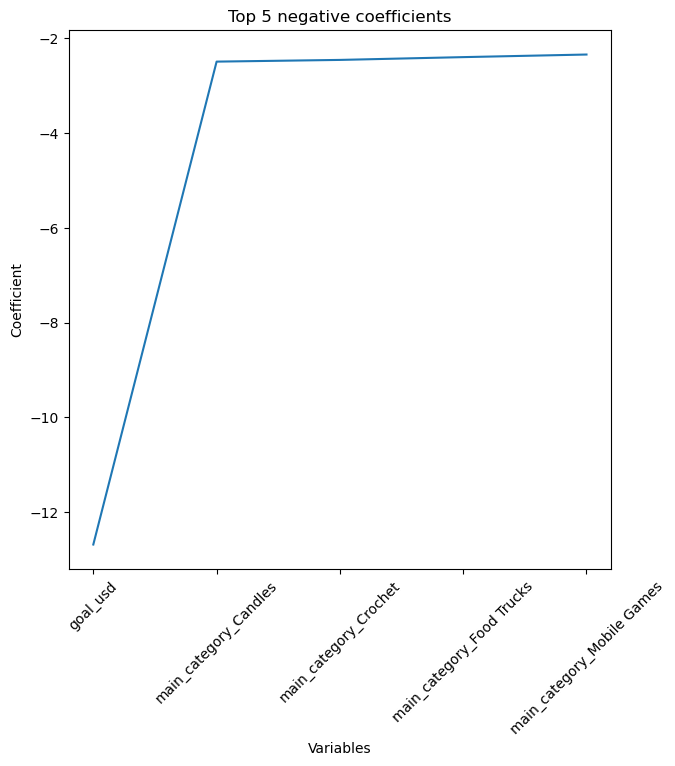

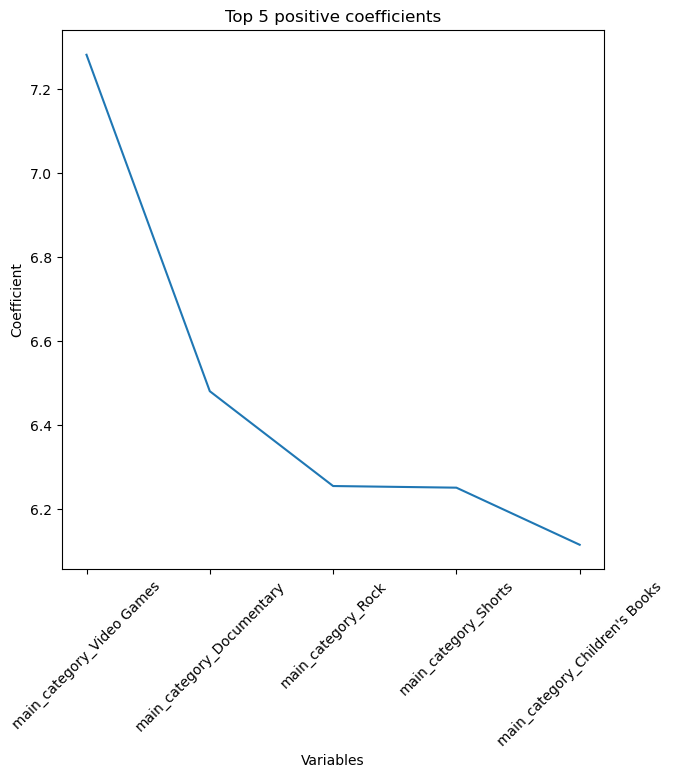

In [115]:
# Plotting the Coefficeint DataFrame
plt.figure(figsize=[7,7])
plt.plot(log_importance_negatives['Variables'][0:5],log_importance_negatives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.title('Top 5 negative coefficients');
plt.show()
plt.figure(figsize=[7,7])
plt.plot(log_importance_positives['Variables'][0:5],log_importance_positives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.title('Top 5 positive coefficients');

#### Tests

#### Optimize (best) model